In [1]:
library(rethinking)

Loading required package: cmdstanr

This is cmdstanr version 0.6.1.9000

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: /root/.cmdstan/cmdstan-2.33.1

- CmdStan version: 2.33.1

Loading required package: posterior

This is posterior version 1.4.1


Attaching package: ‘posterior’


The following objects are masked from ‘package:stats’:

    mad, sd, var


The following objects are masked from ‘package:base’:

    %in%, match


Loading required package: parallel

rethinking (Version 2.40)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




In [2]:
## R code 2.1
ways <- c( 0 , 3 , 8 , 9 , 0 )
ways/sum(ways)

[1] 0.00 0.15 0.40 0.45 0.00

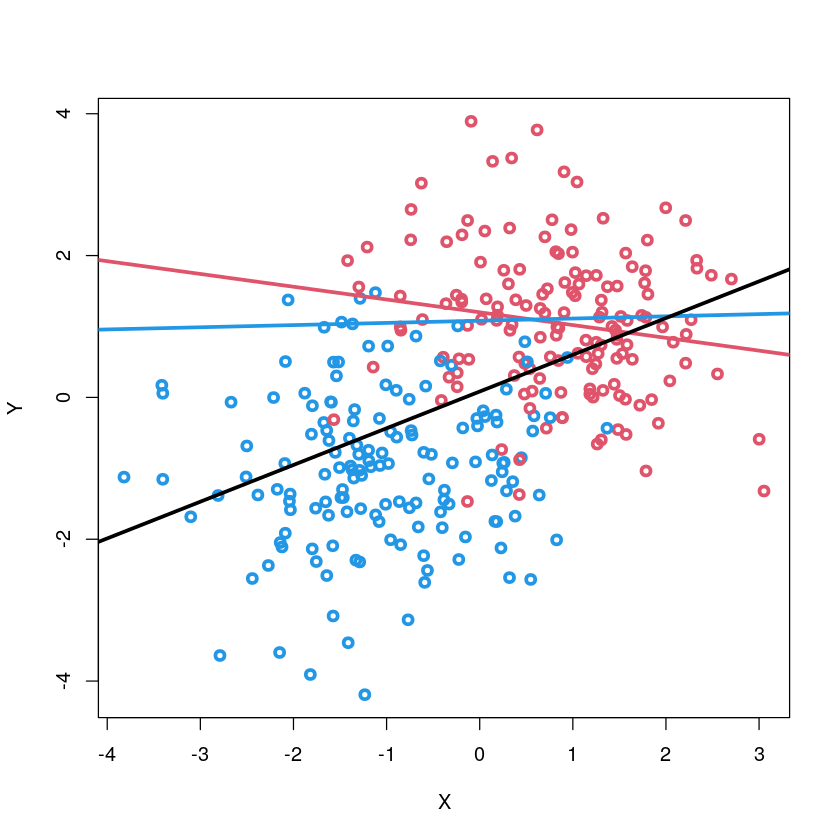

In [11]:
cols <- c(4,2)

N <- 300
Z <- rbern(N)
X <- rnorm(N, 2*Z-1)
Y <- rnorm(N, 2*Z-1)

plot( X , Y, col=cols[Z+1] , lwd=3)

abline(lm(Y[Z==1]~X[Z==1]),col=2, lwd=3)

abline(lm(Y[Z==1]~X[Z==0]),col=4, lwd=3)

abline(lm(Y~X),lwd=3)

In [3]:
# load data and copy
library(rethinking)
data(WaffleDivorce)
d <- WaffleDivorce

# standardize variables
d$D <- standardize( d$Divorce )
d$M <- standardize( d$Marriage )
d$A <- standardize( d$MedianAgeMarriage )

Loading required package: cmdstanr

This is cmdstanr version 0.6.1.9000

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: /root/.cmdstan/cmdstan-2.33.1

- CmdStan version: 2.33.1

Loading required package: posterior

This is posterior version 1.4.1


Attaching package: ‘posterior’


The following objects are masked from ‘package:stats’:

    mad, sd, var


The following objects are masked from ‘package:base’:

    %in%, match


Loading required package: parallel

rethinking (Version 2.40)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




In [4]:
sd( d$MedianAgeMarriage )

[1] 1.24363

In [5]:
m5.1 <- quap(
    alist(
        D ~ dnorm(mu, sigma),
        mu <- a + bA * A ,
        a ~ dnorm(0 , 0.2) ,
        bA ~ dnorm(0, 0.5),
        sigma ~ dexp(1)
    ), data = d
)

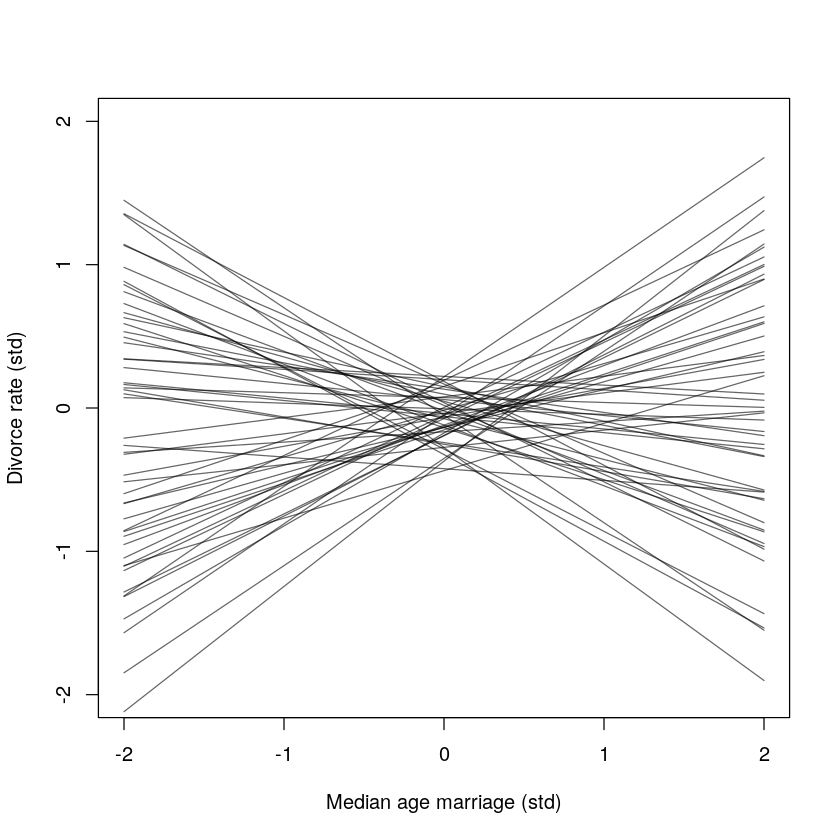

In [6]:
set.seed(10)
prior <- extract.prior(m5.1)
mu <- link(m5.1, post=prior, data=list(A=c(-2,2)))
plot(NULL, xlim=c(-2,2), ylim=c(-2,2), xlab="Median age marriage (std)", ylab="Divorce rate (std)")
for (i in 1:50) lines(c(-2,2), mu[i,], col=col.alpha('black', 0.6))

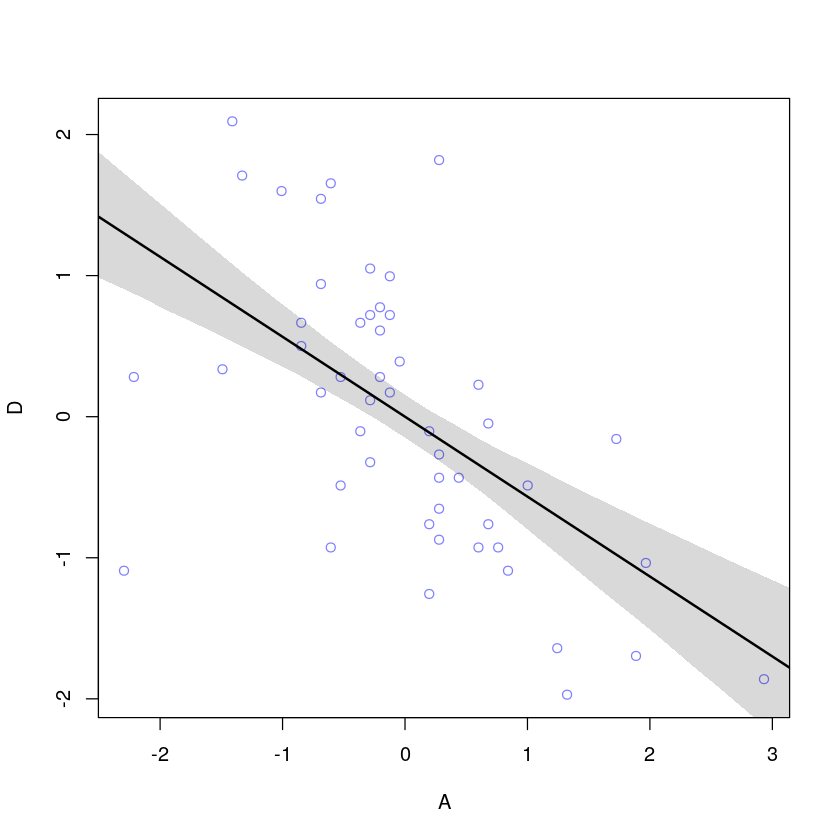

In [10]:
# compute percentile interval of mean
A_seq <- seq(from=-3, to=3.2, length.out=30)
mu <- link(m5.1, data=list(A=A_seq))
mu.mean <- apply(mu, 2, mean)
mu.PI <- apply(mu, 2, PI)

# plot it all
plot(D ~ A, data=d, col=rangi2)
lines(A_seq, mu.mean, lwd=2)
shade(mu.PI, A_seq)

In [17]:
m5.2 <- quap(
    alist(
        D ~ dnorm(mu, sigma),
        mu <- a + bM * M,
        a ~ dnorm(0, 0.2),
        bM ~ dnorm(0, 0.5),
        sigma ~ dexp(1)
    ), data=d
)

In [18]:
head(d)

,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage.SE,Divorce,Divorce.SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860,D,M,A
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45,1.6542053,0.02264406,-0.6062895
2,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00,1.5443643,1.54980162,-0.6866993
3,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00,0.6107159,0.04897436,-0.2042408
4,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26,2.0935693,1.65512283,-1.4103870
5,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00,-0.9270579,-0.26698927,0.5998567
6,Colorado,CO,5.03,25.7,23.5,1.24,11.6,0.94,11,0,0,34277,0.00,1.0500799,0.89154405,-0.2846505
